# The MNIST (Modified National Institute of Standards and Technology) dataset 

The purpose of this lesson is to provide a deeper understanding of how image recognition works using the MNIST dataset.

In [2]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [3]:
import os
import random
from IPython.display import display
from PIL import Image

from functools import partial

# Download MNIST Sample

In [4]:
print(f"The MNIST dataset can be downloaded from here: {URLs.MNIST_SAMPLE}")
path = untar_data(URLs.MNIST_SAMPLE)
print(f"Unpacked here: {path}")

The MNIST dataset can be downloaded from here: https://s3.amazonaws.com/fast-ai-sample/mnist_sample.tgz
Unpacked here: /Users/dima/.fastai/data/mnist_sample


# Inspect Data

In [5]:
!tree -L 2 /Users/dima/.fastai/data/mnist_sample

/Users/dima/.fastai/data/mnist_sample
├── labels.csv
├── train
│   ├── 3
│   └── 7
└── valid
    ├── 3
    └── 7

7 directories, 1 file


In [6]:
def show_n_images(folder_path, n):    
    # Get all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
    
    # Select any 3 images randomly
    selected_images = random.sample(image_files, n)
    
    # Display the selected images
    for img_file in selected_images:
        img_path = os.path.join(folder_path, img_file)
        img = Image.open(img_path)
        display(img)

show_three_images = partial(show_n_images, n=3)

In [7]:
show_three_images(path / "train" / "3")

In [8]:
show_three_images(path / "train" / "7")

In [9]:
img3 = Image.open(path / "train" / "3" / "10.png")
img3

In [10]:
print(array(img3))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238  70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254 141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 254 254 254  34   

In [11]:
array?

Docstring:
array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,
      like=None)

Create an array.

Parameters
----------
object : array_like
    An array, any object exposing the array interface, an object whose
    ``__array__`` method returns an array, or any (nested) sequence.
    If object is a scalar, a 0-dimensional array containing object is
    returned.
dtype : data-type, optional
    The desired data-type for the array. If not given, NumPy will try to use
    a default ``dtype`` that can represent the values (by applying promotion
    rules when necessary.)
copy : bool, optional
    If ``True`` (default), then the array data is copied. If ``None``,
    a copy will only be made if ``__array__`` returns a copy, if obj is
    a nested sequence, or if a copy is needed to satisfy any of the other
    requirements (``dtype``, ``order``, etc.). Note that any copy of
    the data is shallow, i.e., for arrays with object dtype, the new
    array will point to the 

---

The same image, but as **Tensor**.

In [12]:
im3_t = tensor(img3)
df = pd.DataFrame(im3_t)
df.style.set_properties(**{'font-size':'8pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,42,118,219,166,118,118,6,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,103,242,254,254,254,254,254,66,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,18,232,254,254,254,254,254,238,70,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,104,244,254,224,254,254,254,141,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,207,254,210,254,254,254,34,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,84,206,254,254,254,254,41,0,0,0,0,0,0,0,0,0


In [13]:
tensor?

Signature:
tensor(
    x,
    *rest,
    dtype=None,
    device=None,
    requires_grad=False,
    pin_memory=False,
)
Docstring: Like `torch.as_tensor`, but handle lists too, and can pass multiple vector elements directly.
File:      ~/venv/lib/python3.11/site-packages/fastai/torch_core.py
Type:      function

# First Try: Pixel Similarity

Before we create a more advanced model, let's start with something quick and simple. We'll calculate the average of all pixels for a given number.

In [60]:
def avg_mask(number="3"):
    folder_path = path / "train" / number
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
    return [tensor(Image.open(folder_path / o)) for o in image_files]
    

In [61]:
three_tensors = avg_mask("3")

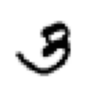

In [62]:
show_image(three_tensors[112]);

In [63]:
torch.stack?

Docstring:
stack(tensors, dim=0, *, out=None) -> Tensor

Concatenates a sequence of tensors along a new dimension.

All tensors need to be of the same size.

.. seealso::

    :func:`torch.cat` concatenates the given sequence along an existing dimension.

Arguments:
    tensors (sequence of Tensors): sequence of tensors to concatenate
    dim (int, optional): dimension to insert. Has to be between 0 and the number
        of dimensions of concatenated tensors (inclusive). Default: 0

Keyword args:
    out (Tensor, optional): the output tensor.

Example::

    >>> x = torch.randn(2, 3)
    >>> x
    tensor([[ 0.3367,  0.1288,  0.2345],
            [ 0.2303, -1.1229, -0.1863]])
    >>> torch.stack((x, x)) # same as torch.stack((x, x), dim=0)
    tensor([[[ 0.3367,  0.1288,  0.2345],
             [ 0.2303, -1.1229, -0.1863]],

            [[ 0.3367,  0.1288,  0.2345],
             [ 0.2303, -1.1229, -0.1863]]])
    >>> torch.stack((x, x)).size()
    torch.Size([2, 2, 3])
    >>> torch.sta

In [64]:
# Also cast to float and normilize to be between 0 and 1
threes = torch.stack(three_tensors).float()/255

In [65]:
print(f"Shape: {threes.shape}, rank: {threes.ndim}")

Shape: torch.Size([6131, 28, 28]), rank: 3


The rank of a tensor refers to the number of dimensions (or axes) it has. 

| Tensor Type | Rank | Example Shape      | Example Description         |
|-------------|------|--------------------|-----------------------------|
| Scalar      | 0    | `()`               | A single number             |
| Vector      | 1    | `(3,)`             | A 1D array                  |
| Matrix      | 2    | `(3, 4)`           | A 2D array (rows × columns) |
| 3D Tensor   | 3    | `(2, 3, 4)`        | 3D array                    |
| n-D Tensor  | n    | `(d1, d2, ..., dn)`| n-dimensional array         |


<Axes: >

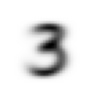

In [66]:
# Take a mean along dimension zero:
mean3 = threes.mean(0)
show_image(mean3)

In [69]:
seven_tensors = avg_mask("7")
sevents = torch.stack(seven_tensors).float()/255
mean7 = sevents.mean(0)

<Axes: >

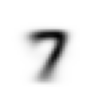

In [72]:
show_image(mean7)

In [77]:
# PyTorch already provides root mean squared error (RMSE) or L2 norm.
F.mse_loss(threes[112].float(), mean3), F.mse_loss(threes[112].float(), mean7) # ((a_3 - mean7)**2).mean().sqrt()

(tensor(0.0670), tensor(0.1046))

In [ ]:
# === Next read: "Computing Metrics Using Broadcasting"